<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython.git

Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 826 (delta 274), reused 155 (delta 108), pack-reused 455 (from 1)
Receiving objects: 100% (826/826), 50.12 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (394/394), done.


In [2]:
import os
os.chdir("/content/ERAP_CursoPython/Modulo3_RedesNeuronales")

# Redes Neuronales Artificiales

### Inspriación biológia

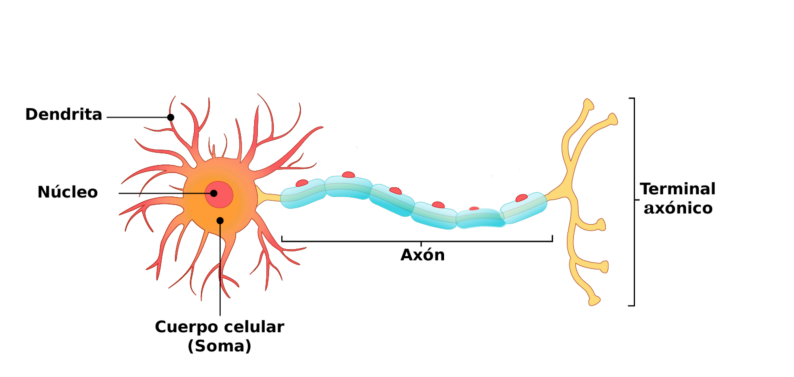

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/NeuronEsquema.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

## Modelo matemático

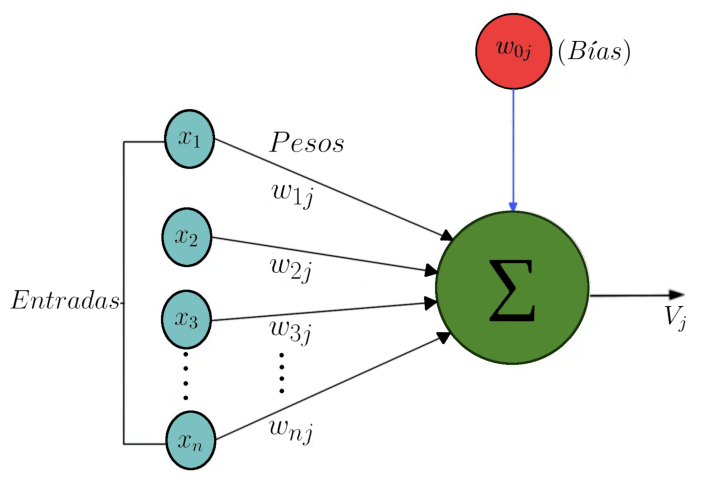

In [4]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/ModeloRedNeuronal.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

## Ecuación:

$$
y_j = f \left(\sum_{i=0}^n x_i w_{ij}. \right).
$$

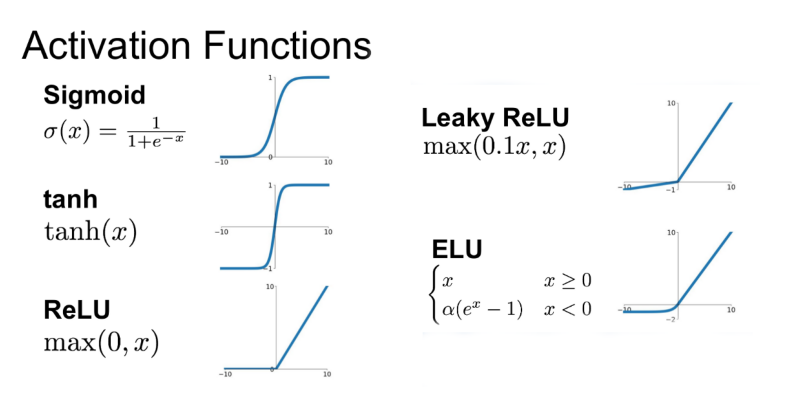

In [5]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/ActivationsFunctions.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

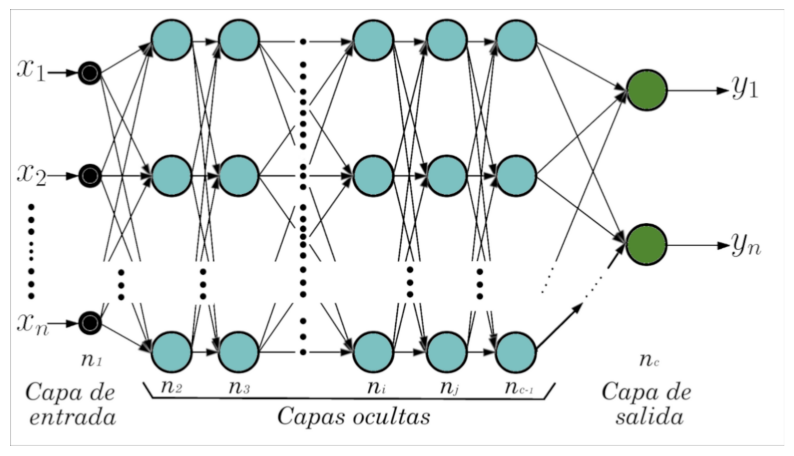

In [6]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/RedMulticapa.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()



# Preprocesado de datos

    - Datos de entrenamiento
    - Datos de validación
    - Datos de prueba

# Entrenamiento de una red feed-forward

### - Topología de la red

La topología de una red neuronal se refiere a su estructura interna, es decir, cómo están organizadas y conectadas las neuronas en la red. Incluye varios aspectos clave:

1. **Número de capas:**

    - Capa de entrada: recibe los datos de entrada.

    - Capas ocultas: procesan los datos mediante combinaciones lineales y funciones de activación.

    - Capa de salida: entrega el resultado final (por ejemplo, una clase predicha).

2. **Número de neuronas por capa:**

    - Cuantas más neuronas, más capacidad tiene la red para aprender patrones complejos (aunque también aumenta el riesgo de sobreajuste).

3. **Tipo de conexiones:**

En una red recurrente, puede haber retroalimentación, es decir, las salidas de una capa pueden volver como entradas a sí mismas u otras capas anteriores.

4. **Función de activación usada en cada capa:**

Define cómo responde cada neurona ante una entrada. Ejemplos: ReLU, sigmoide, tanh, softmax.


### ¿Por qué importa la topología?
Una topología demasiado simple puede no captar patrones complejos (Sub-ajuste).

Una topología demasiado compleja puede memorizar los datos (Sobre-ajuste).

La elección adecuada depende del problema, del tamaño del dataset, y a veces requiere prueba y error.



#  Inicialización de los pesos de la red

La inicialización de los pesos en una red neuronal afecta directamente a:

🔄 La velocidad de convergencia durante el entrenamiento.

📉 La calidad del resultado final (evitando problemas como gradientes que desaparecen o explotan).

🤖 La capacidad de la red para aprender correctamente desde el inicio.


##**Buenas prácticas**

      -Usa He para ReLU o derivadas (LeakyReLU, etc.).

      -Usa Glorot (Xavier) para tanh o sigmoid.

      -Si no estás seguro, TensorFlow/Keras aplica automáticamente la
       inicialización adecuada según la función de activación.


## Poner todos los pesos en cero o uno: es un **mala práctica**.

Hace que todas las neuronas en una capa aprendan lo mismo, entonces la red no aprende.


**Para capas convolucionales, estas inicializaciones también son válidas.**




### - Actualización de los pesos de la red.

Cada capa tiene un conjunto de pesos y sesgos que se ajustan durante el entrenamiento mediante retropropagación y optimización (generalmente con descenso del gradiente).

$$
\Delta w =- \eta \nabla E.
$$

### Ajuste de hiperparámetros:

        - Búsqueda sistemática, o en inglés grid search.
        - Búsqueda aleatoria.
        - Búsqueda inteligente

### Sobreaprendizaje

        - Parada temprana


# Ejemplo: vamos a usar una red neuronal para hacer clasificación multiclase

En clasificación multiclase, se suele usar la función **"softmax"** en la capa de salida y la función de pérdida **"categorical_crossentropy"**.


Una red neuronal básica consta de:
- Capa de entrada
- Capas ocultas
- Capa de salida



Funciones de activación comunes:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh

In [7]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
# 2. Cargar un dataset con más de dos clases: Wine dataset
from sklearn.datasets import load_wine
data = load_wine()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='class')

In [9]:
# 3. Preprocesamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificamos la variable objetivo a one-hot
y_encoded = to_categorical(y)

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,
                                                    test_size=0.2, random_state=42, stratify=y)

In [10]:
# 4. Construcción del modelo con Keras
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427 (1.67 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

# Antes de continuar, dos cosas importantes:

### Función Softmax

**(Usada en model.add(Dense(3, activation='softmax')))**

La función *softmax* toma como entrada un vector de valores reales y lo transforma en un vector de probabilidades,
donde cada valor estará entre 0 y 1, y la suma total será 1. Se define como:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Donde:

- $z_i$ es la entrada (logit) para la clase $ i $,
- $K $ es el número total de clases,
- La salida representa la probabilidad de que el ejemplo pertenezca a la clase $i$.

**Ejemplo numérico**
Supón que tu red predice el vector:
$$
z=[2.0,1.0,0.1]
$$

Aplicando softmax:
$$
softmax(z)≈[0.659,0.242,0.099]
$$
→ Se interpreta como: la red cree que la clase 0 tiene un 65.9% de probabilidad, la clase 1 un 24.2%, etc.

### Función de pérdida: *Categorical Crossentropy*

La **categorical crossentropy** se utiliza como función de pérdida para problemas de clasificación multiclase. Compara la distribución de probabilidades predicha por el modelo con la distribución verdadera (que suele ser un *one-hot vector*).

#### Fórmula:

$$
\text{CCE}(y, \hat{y}) = -\sum_{i=1}^{K} y_i \cdot \log(\hat{y}_i)
$$

Donde:

- $y $ es el vector real (one-hot),
- $\hat{y} $ es el vector de probabilidades predicho por el modelo (por ejemplo, por una función softmax),
- $K $ es el número total de clases.

#### Ejemplo:

Supongamos que tenemos 3 clases, y el vector real es:

$$
y = [0,\ 1,\ 0]
$$

y el modelo predice las siguientes probabilidades:

$$
\hat{y} = [0.1,\ 0.7,\ 0.2]
$$

Entonces la *categorical crossentropy* será:

$$
\text{CCE} = - (0 \cdot \log 0.1 + 1 \cdot \log 0.7 + 0 \cdot \log 0.2) = - \log 0.7 \approx 0.357
$$

#### Interpretación:

- Cuanto más se acerque la probabilidad predicha a 1 para la clase correcta, menor será la pérdida.
- La pérdida es mayor cuando la red se "equivoca" y predice baja probabilidad para la clase real.


In [11]:
# 5. Entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=0)


Precisión en el conjunto de prueba: 1.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



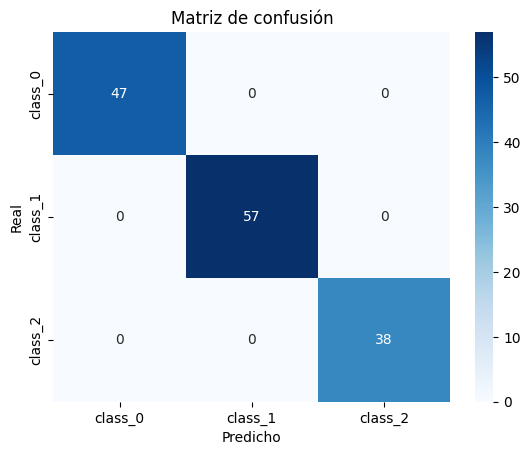

In [14]:
# 6. Evaluación en entrenemiento
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_train)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_train, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


Precisión en el conjunto de prueba: 0.9444
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



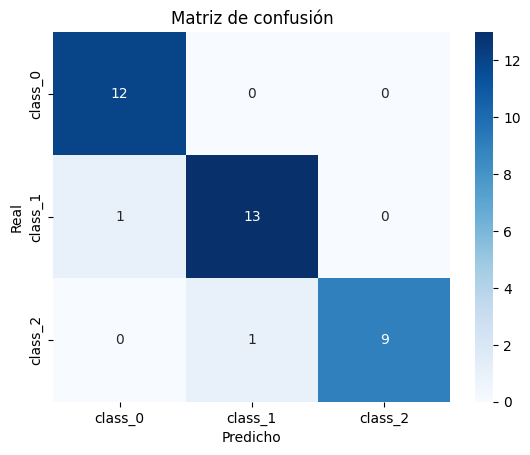

In [15]:
# 6. Evaluación en test
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

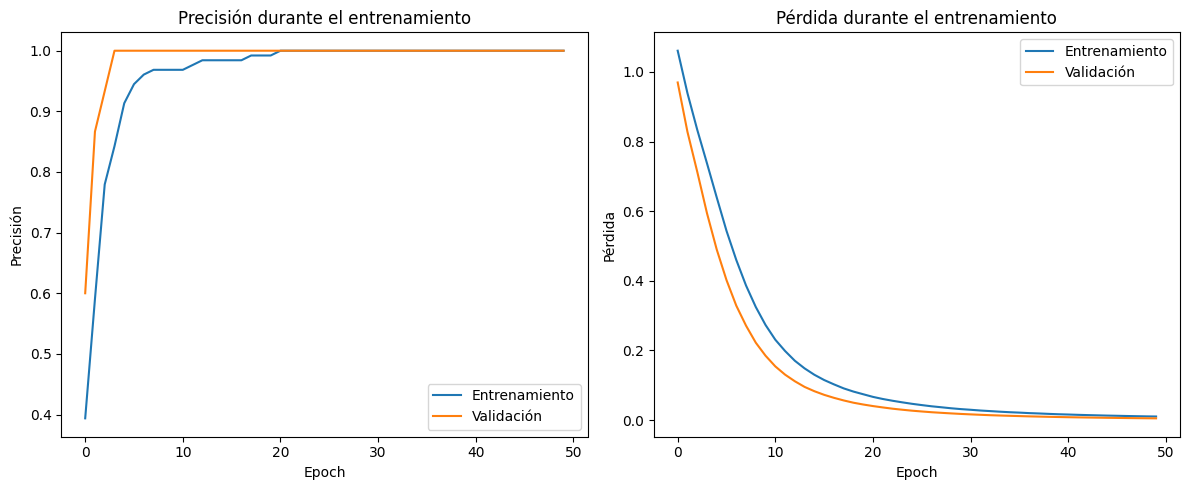

In [16]:
# 7. Visualización del entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

### Para hacer una predicción manual

In [17]:
import numpy as np

# 1. Nuevo dato crudo (por ejemplo: 13 características como en wine dataset)
nuevo_dato_crudo = np.array([[13.2, 2.77, 2.51, 18.5, 98.0, 2.4, 2.64, 0.3, 1.46, 5.28, 1.02, 3.58, 820.0]])

# 2. Escalarlo con el mismo scaler que usaste en el entrenamiento
nuevo_dato_escalado = scaler.transform(nuevo_dato_crudo)

# 3. Hacer la predicción
probabilidades = model.predict(nuevo_dato_escalado)

# 4. Obtener la clase con mayor probabilidad
clase_predicha = np.argmax(probabilidades)

# 5. Mostrar resultados
print(f"Probabilidades por clase: {probabilidades}")
print(f"Clase predicha: {clase_predicha}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Probabilidades por clase: [[0.98919207 0.00668511 0.00412287]]
Clase predicha: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Actividad en clase

Vamos a entrenar una red para que aprenda a clasificar los diferentes animales, deacuerdo a las carácterísticas dadas en la base de datos

Características importantes:

7 clases de animales:

      - Mamífero

      - Ave

      - Reptil

      - Pez

      - Anfibio

      - Insecto

      - Invertebrado

In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Cargar y preparar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
column_names = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk',
    'airborne', 'aquatic', 'predator', 'toothed', 'backbone',
    'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'
]

df = pd.read_csv(url, header=None, names=column_names)
df = df.drop('animal_name', axis=1)

In [63]:
# 2. Preprocesamiento
X = df.drop('class_type', axis=1)
y = df['class_type'] - 1  # Convertir clases de 1-7 a 0-6

# Identificar columnas para transformación
categorical_features = ['legs']
numeric_features = list(set(X.columns) - set(categorical_features))

# Crear transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

In [64]:
# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Convertir etiquetas a one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [71]:
# 4. Construir modelo de red neuronal
model = Sequential([ Dense(3, activation='tanh', input_shape=(X_train.shape[1],)),
                      Dense(5, activation='linear'),
                      Dense(7, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
# 5. Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=8,
    validation_split=0.15,
    callbacks=[early_stop],
    verbose=0
)


Precisión en el conjunto de prueba: 0.7500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        33
           1       0.84      1.00      0.91        16
           2       0.00      0.00      0.00         4
           3       0.53      1.00      0.69        10
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         8

    accuracy                           0.75        80
   macro avg       0.45      0.45      0.40        80
weighted avg       0.64      0.75      0.66        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


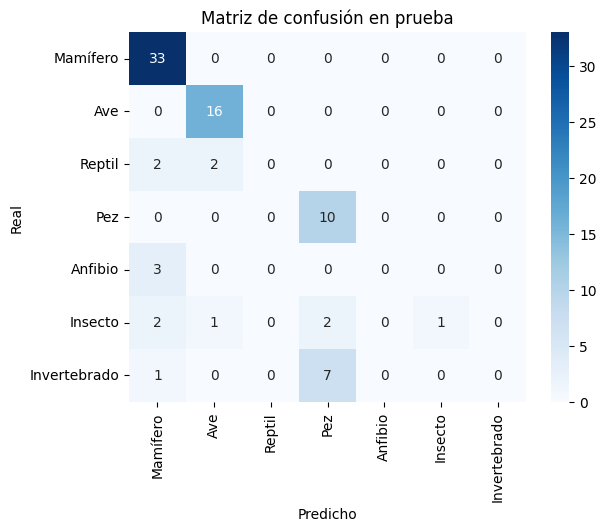

In [73]:
# 6. Evaluación en entrenemiento
loss, acc = model.evaluate(X_train, y_train_cat, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_train)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_train_cat, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred))

# Matriz de confusión

class_names = ['Mamífero','Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto','Invertebrado']
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión en prueba")
plt.show()


Precisión en el conjunto de prueba: 0.7143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.71        21
   macro avg       0.30      0.43      0.35        21
weighted avg       0.53      0.71      0.60        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


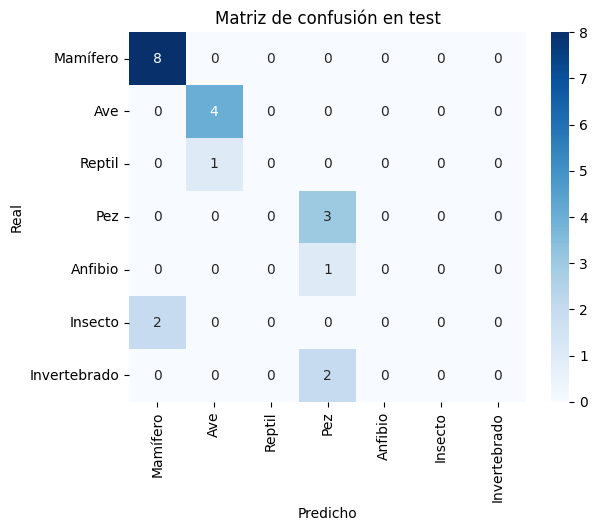

In [74]:
# 6. Evaluación en test
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {acc:.4f}")

# Predicciones y reporte
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión

class_names = ['Mamífero','Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto','Invertebrado']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión en test")
plt.show()

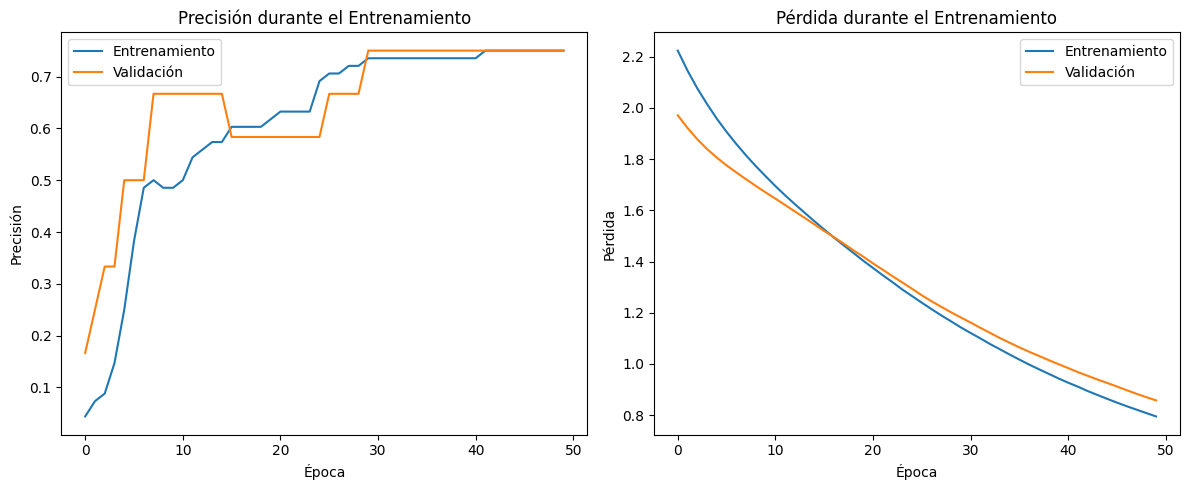

In [75]:
# 7. Visualizar rendimiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Guardar el modelo (opcional)
# model.save('zoo_classifier_model.h5')